In [4]:
#Library
import scipy.io
import pandas as pd
from scipy.stats import norm
from numpy import mean
from numpy import std
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


### Kernel density estimation (KDE) is a non-parametric method for estimating the probability density function of a given random variable.

While there are several ways of computing the kernel density estimate in Python, we'll use the popular machine learning library scikit-learn for this purpose.

In [5]:
data = scipy.io.loadmat('irisdata.mat') 

In [141]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: SOL2, Created on: Mon Mar 12 07:30:10 2001',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[5.2, 4.8, 5.5, 5.5, 5.1, 4.4, 4.8, 5.3, 6.8, 5.7, 5.8, 6. , 5.6,
         6.1, 5.6, 6.2, 7.2, 6.4, 7.9, 6.1, 6.4, 6.7, 6.8, 6.3, 5.9, 5. ,
         4.7, 5.2, 5. , 4.4, 4.5, 5.1, 4.6, 6.6, 6. , 5.5, 5.4, 6.3, 5.5,
         5. , 5.7, 5.7, 6.1, 7.4, 6.3, 6.3, 6.9, 5.8, 6.7, 6.2, 5. , 5.2,
         5.4, 4.9, 4.9, 5. , 5. , 5.1, 5. , 6.7, 5.5, 6. , 6.7, 5.5, 5.8,
         5.7, 5.1, 6.2, 7.2, 6.4, 7.7, 6. , 6.9, 6.7, 6.5],
        [3.5, 3.1, 4.2, 3.5, 3.4, 3.2, 3. , 3.7, 2.8, 2.6, 2.7, 3.4, 3. ,
         3. , 2.7, 2.9, 3.2, 2.8, 3.8, 2.6, 3.1, 3.1, 3.2, 2.5, 3. , 3.4,
         3.2, 4.1, 3.2, 3. , 2.3, 3.8, 3.2, 3. , 2.9, 2.4, 3. , 2.3, 2.6,
         2.3, 2.9, 2.8, 3. , 2.8, 2.8, 3.4, 3.1, 2.7, 3. , 3.4, 3. , 3.4,
         3.4, 3.1, 3.6, 3.5, 3.5, 3.8, 3.3, 3. , 2.4, 2.7, 3.1, 2.5, 2.6,
         3. , 2.5, 2.8, 3. , 2.8, 3. , 3. , 3.1, 3.3, 3.

In [34]:
d = {'data1': data['data'][0],'data2': data['data'][1],'data3': data['data'][2] ,'data4': data['data'][3],
     'traindata1': data['traindata'][0],'traindata2': data['traindata'][1],'traindata3': data['traindata'][2],
     'traindata4': data['traindata'][3],'trainclass': data['trainclass'][0],
     'dataclass': data['dataclass'][0]}
df = pd.DataFrame(data=d)
df

,data1,data2,data3,data4,traindata1,traindata2,traindata3,traindata4,trainclass,dataclass
0,5.2,3.5,1.5,0.2,5.1,3.5,1.4,0.2,1,1
1,4.8,3.1,1.6,0.2,4.9,3.0,1.4,0.2,1,1
2,5.5,4.2,1.4,0.2,4.7,3.2,1.3,0.2,1,1
3,5.5,3.5,1.3,0.2,4.6,3.1,1.5,0.2,1,1
4,5.1,3.4,1.5,0.2,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...,...,...,...,...
70,7.7,3.0,6.1,2.3,6.9,3.2,5.7,2.3,3,3
71,6.0,3.0,4.8,1.8,5.6,2.8,4.9,2.0,3,3
72,6.9,3.1,5.1,2.3,7.7,2.8,6.7,2.0,3,3
73,6.7,3.3,5.7,2.5,6.3,2.7,4.9,1.8,3,3


In [170]:
x_train=df['traindata1']
x_train=x_train[:, np.newaxis]
x_test =df['data1'][:, np.newaxis] 


C:\Users\meemk\AppData\Local\Temp\ipykernel_30948\2519127237.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train=x_train[:, np.newaxis]
C:\Users\meemk\AppData\Local\Temp\ipykernel_30948\2519127237.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test =df['data1'][:, np.newaxis]


##### The code below stores the points in x_train. I  make a scatter plot of these points along the y-axis and  generate a histogram of these points.

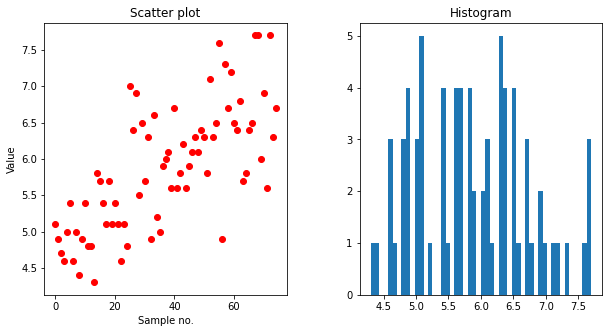

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplot(121)
plt.scatter(np.arange(len(x_train)), x_train, c='red')
plt.xlabel('Sample no.')
plt.ylabel('Value')
plt.title('Scatter plot')
plt.subplot(122)
plt.hist(x_train, bins=50)
plt.title('Histogram')
fig.subplots_adjust(wspace=.3)
plt.show()


### Using Scikit-Learn's KernelDensity

Now I create a KernelDensity object and use the fit() method to find the score of each sample as shown in the code below. The KernelDensity() method uses two default parameters, i.e. kernel=gaussian and bandwidth=1.

In [183]:
model = KernelDensity()
model.fit(x_train)
log_dens = model.score_samples(x_test)

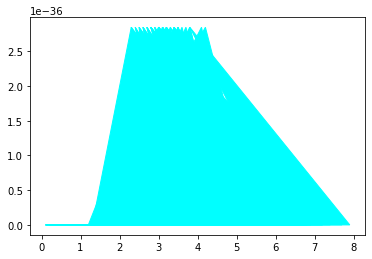

In [153]:
plt.fill(x_test, np.exp(log_dens), c='cyan')
plt.show()

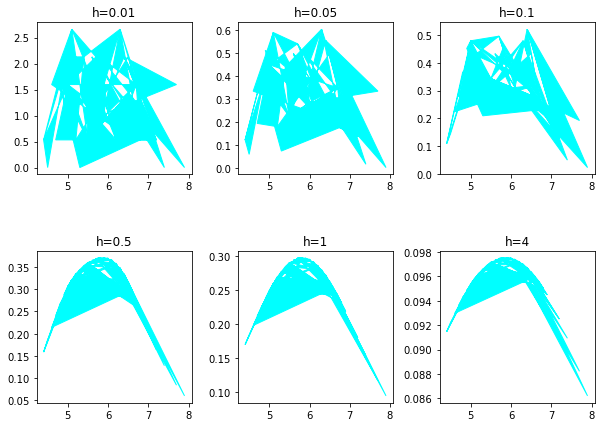

In [184]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test)
    plt.subplot(ind)
    plt.fill(x_test, np.exp(score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

### Tuning the Bandwidth Parameter
The scikit-learn library allows the tuning of the bandwidth parameter via cross-validation and returns the parameter value that maximizes the log-likelihood of data. The function we can use to achieve this is GridSearchCV(), which requires different values of the bandwidth parameter.

In [185]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95])})

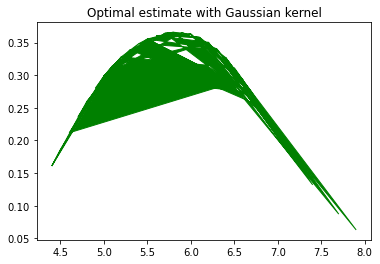

optimal bandwidth: 0.55


In [186]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test)
plt.fill(x_test, np.exp(log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))